### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [26]:
print(X_train)

[[-1.50226745e+00  1.10246309e+00 -3.32110906e-01 -3.37095149e-01
  -2.35725003e-01]
 [ 2.47658416e+00 -7.32264700e-01  6.74710006e-02  3.52343397e-01
   2.97141210e-01]
 [-1.68727904e+00  9.65275392e-04  6.13470314e-01 -9.00395653e-01
  -9.00780945e-01]
 [ 1.74642478e+00 -2.19065706e-02 -3.79835571e-01 -8.51660724e-01
  -9.40738666e-02]
 [-1.92979534e+00 -7.44229701e-01 -3.00465307e-01  2.33873591e-01
  -3.41255995e-01]
 [-2.07181677e-01  8.12637710e-02 -3.36179840e-01  3.00670817e-02
  -2.40524177e-01]
 [ 6.52125575e-01  3.92560611e-01  8.12218089e-01  1.68852820e-01
   1.43843167e-01]
 [ 7.73999259e-01  7.13086800e-01 -1.13745080e-01 -7.51870758e-01
   5.23706023e-02]
 [-3.84786639e-01 -1.19506206e+00  1.19236503e+00  7.52134361e-01
  -4.55023515e-01]
 [ 8.51927626e-01  1.49455700e+00 -1.24621209e+00 -1.03335017e+00
  -7.78421820e-01]
 [ 1.01355006e+00  7.97023134e-01 -1.85293455e+00  4.59581779e-01
  -9.17741045e-01]
 [ 2.26957200e+00 -8.32723441e-01  1.47428533e+00 -6.22060928e-02

### Visualizing the data  
Use `matplotlib` to visualize the given data.

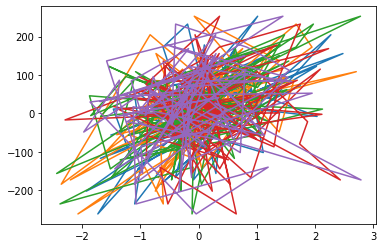

In [27]:
import matplotlib.pyplot as plt
plt.plot(X_train, y_train)
plt.show()
# Your code here

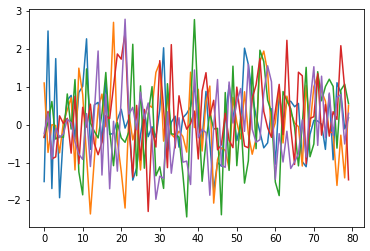

In [28]:
plt.plot(X_train)
plt.show()

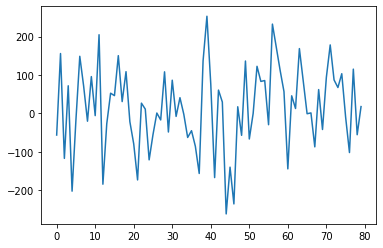

In [29]:
plt.plot(y_train)
plt.show()

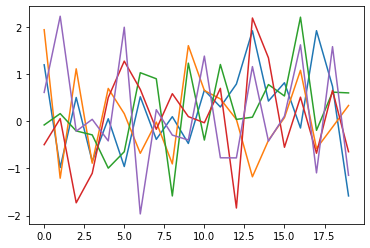

In [30]:
plt.plot(X_test)
plt.show()

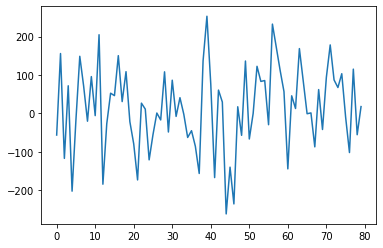

In [31]:
plt.plot(y_train)
plt.show()


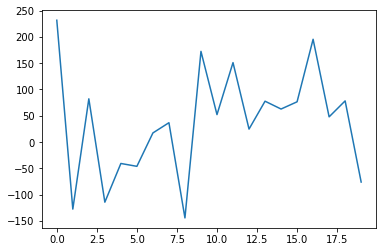

In [32]:
plt.plot(y_test)
plt.show()

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [33]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000, b=0, w=np.full(X.shape[1],0)):

      self.learning_rate=learning_rate
      self.n_iters=n_iters
      self.b=b
      self.w=w

      

        # Your code here

       # pass  # Uncomment this when you're done with this function


    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
      no_=X.shape[0]
      count_=X.shape[1]

      for i in range (self.n_iters):
        predict=np.matmul(X,self.w)+self.b
        derivative_= np.full(count_,0)

        for k in range (count_):
          derivative_[k]=np.sum(np.dot(X[:,k],y-predict)) * -2 / no_
          derivative_b = np.sum(y-predict) * -2 / no_
          self.b = self.b - self.learning_rate *derivative_b
          self.w = self.w - self.learning_rate * derivative_
           

        # Gradient Descent code goes here

       # pass  # Uncomment this when you're done with this function
        
        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
      return np.matmul(X,self.w)+self.b

        # Code goes here

       # pass  # Uncomment this when you're done with this function

### Initializing, Training & Predictions

In [34]:
# Now, we make an object of our custom class.
regressor = LinearRegression() # You may pass the custom parameters or let the default values take it ahead

# Call the fit method on the object to train (pass appropriate part of dataset)


# Now, let's see our what our model predicts
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test) # pass appropriate part of dataset

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [35]:
def mean_squared_error(y_true, y_pred):
  return np.sum(np.dot(y_true-y_pred,y_true-y_pred))/y_true.shape
       # return the mean squared error
      # pass  # Uncomment this when you're done with this function


def r2_score(y_true, y_pred):
  ssreg=np.sum(np.dot(y_true-y_pred,y_true-y_pred))
  sstot=np.sum(np.dot( y_true-np.mean(y_true),y_true-np.mean(y_true)))
  r2_score=1-ssreg/sstot
  return r2_score
      # return the r2 score
      #pass  # Uncomment this when you're done with this function
          

mse = mean_squared_error(predictions,y_test) # Pass appropriate parts of dataset


print("MSE:", mse)

accu = r2_score(predictions, y_test) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: [398.62133504]
Accuracy: 0.95909551005883
